In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
#information about the dataset
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#describing about the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.shape

(150, 5)

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
#count the value
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
#finding the null value
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [47]:
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

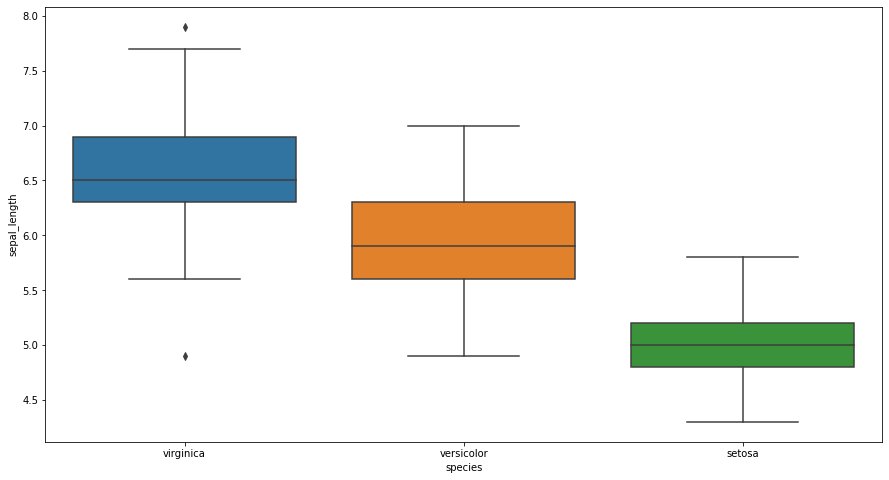

In [21]:
# Relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='species',y='sepal_length',data=df.sort_values('sepal_length',ascending=False))

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

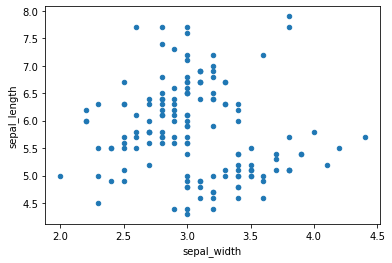

In [24]:
# Relationship between species and sepal width
df.plot(kind='scatter',x='sepal_width',y='sepal_length')

C:\Users\adi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


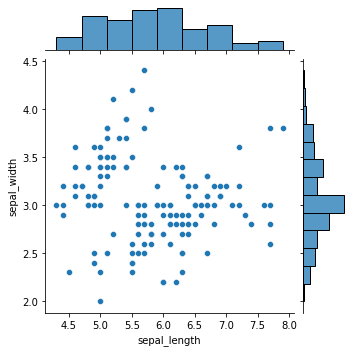

In [25]:
# Relationship between sepal width and sepal length
sns.jointplot(x="sepal_length", y="sepal_width", data=df, size=5)

C:\Users\adi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


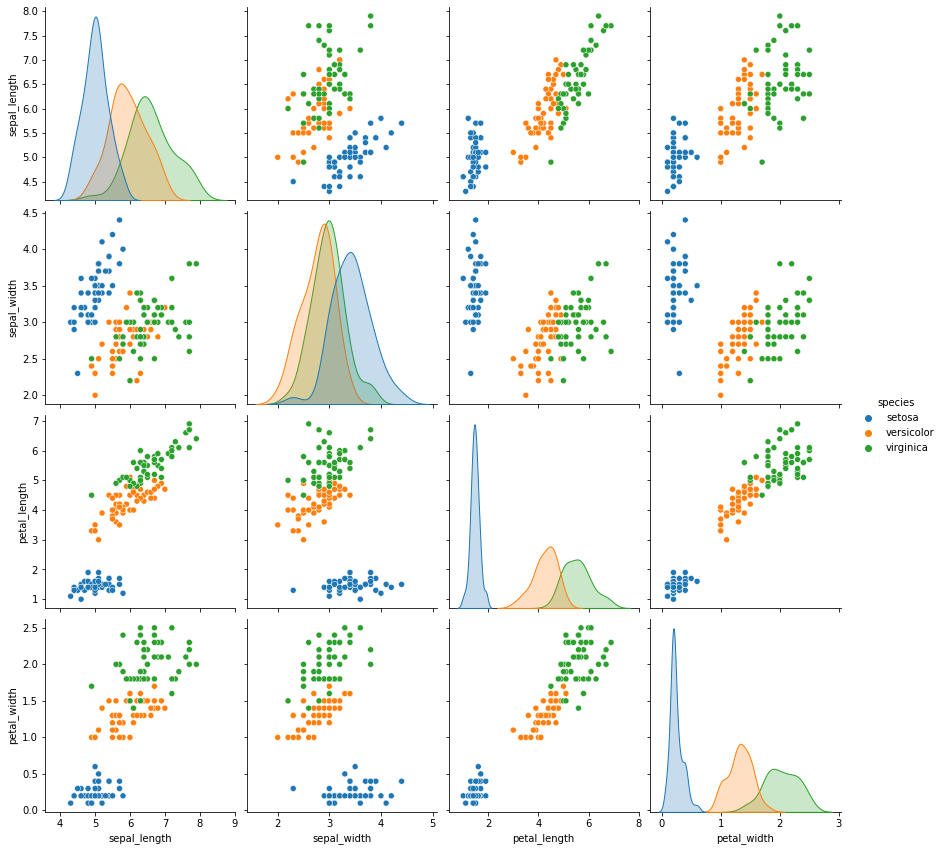

In [26]:
# Pairplot
sns.pairplot(df, hue="species", size=3)

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

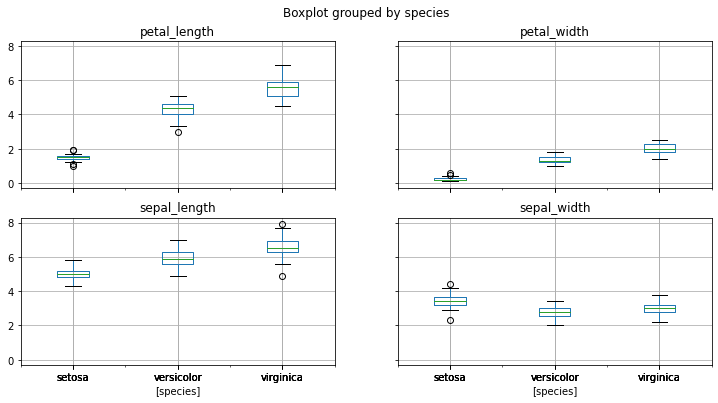

In [27]:
# Boxplot
df.boxplot(by="species", figsize=(12, 6))

<AxesSubplot:>

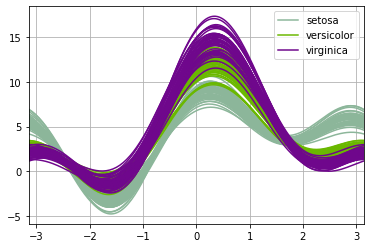

In [29]:
# andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "species")

<Figure size 1080x1080 with 0 Axes>

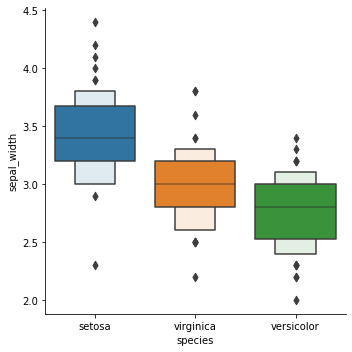

In [30]:
# CategoricalPlot
plt.figure(figsize=(15,15))
sns.catplot(x='species',y='sepal_width',data=df.sort_values('sepal_width',ascending=False),kind='boxen')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

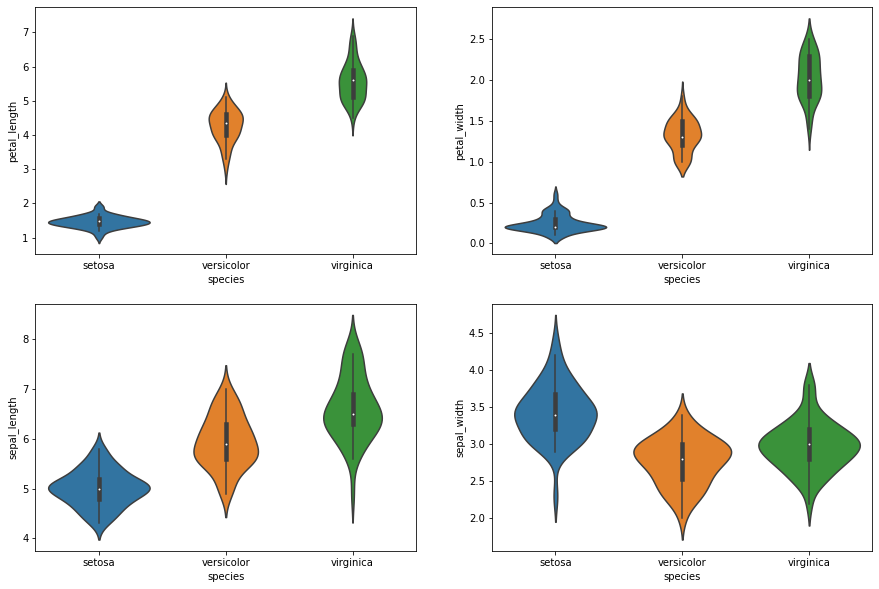

In [32]:
# Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [33]:
X=df.drop('species',axis=1)
y=df['species']

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [35]:
df['species'] = pd.Categorical(df.species)
df['species'] = df.species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.species)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [37]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 4s 358ms/step - loss: 1.9205 - accuracy: 0.3365 - val_loss: 1.6668 - val_accuracy: 0.3333
Epoch 2/45
4/4 [==============================] - 0s 73ms/step - loss: 1.5683 - accuracy: 0.3654 - val_loss: 1.3792 - val_accuracy: 0.6667
Epoch 3/45
4/4 [==============================] - 0s 53ms/step - loss: 1.3212 - accuracy: 0.6635 - val_loss: 1.1652 - val_accuracy: 0.6667
Epoch 4/45
4/4 [==============================] - 0s 72ms/step - loss: 1.1192 - accuracy: 0.6635 - val_loss: 0.9912 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 55ms/step - loss: 0.9637 - accuracy: 0.6635 - val_loss: 0.8602 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 53ms/step - loss: 0.8431 - accuracy: 0.6635 - val_loss: 0.7901 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 29ms/step - loss: 0.7894 - accuracy: 0.7404 - val_loss: 0.7660 - val_accuracy: 0.8667
Epoch 8/45
4/4 [==========

In [40]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 14ms/step - loss: 0.3805 - accuracy: 0.9556


[0.3805406391620636, 0.9555555582046509]

In [41]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 197ms/step
[[0.00658085 0.33276322 0.6606559 ]
 [0.00580971 0.3092698  0.68492055]
 [0.07968098 0.59412307 0.32619596]
 [0.05084997 0.5383588  0.41079128]
 [0.9231301  0.06828084 0.00858909]
 [0.05144388 0.5877731  0.3607831 ]
 [0.00550606 0.26622114 0.7282728 ]
 [0.00617179 0.28225896 0.71156925]
 [0.9211065  0.07040492 0.00848862]
 [0.01264445 0.40205145 0.5853041 ]]


In [42]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 2 1 1 0 1 2 2 0 2]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [43]:
history.history['accuracy']

[0.3365384638309479,
 0.36538460850715637,
 0.6634615659713745,
 0.6634615659713745,
 0.6634615659713745,
 0.6634615659713745,
 0.7403846383094788,
 0.75,
 0.692307710647583,
 0.807692289352417,
 0.932692289352417,
 0.7884615659713745,
 0.7307692170143127,
 0.75,
 0.75,
 0.7307692170143127,
 0.8461538553237915,
 0.942307710647583,
 0.9519230723381042,
 0.9711538553237915,
 0.9134615659713745,
 0.9038461446762085,
 0.9134615659713745,
 0.8846153616905212,
 0.8653846383094788,
 0.9230769276618958,
 0.9519230723381042,
 0.932692289352417,
 0.9134615659713745,
 0.8846153616905212,
 0.9038461446762085,
 0.9230769276618958,
 0.9615384340286255,
 0.9711538553237915,
 0.9711538553237915,
 0.9711538553237915,
 0.942307710647583,
 0.8653846383094788,
 0.8365384340286255,
 0.8653846383094788,
 0.8942307829856873,
 0.932692289352417,
 0.9711538553237915,
 0.9711538553237915,
 0.9711538553237915]

In [44]:
history.history['val_accuracy']

[0.3333333432674408,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.8666666746139526,
 0.6666666865348816,
 0.6666666865348816,
 0.9777777791023254,
 0.800000011920929,
 0.7333333492279053,
 0.7777777910232544,
 0.7777777910232544,
 0.7555555701255798,
 0.7777777910232544,
 0.8888888955116272,
 0.9555555582046509,
 0.9777777791023254,
 0.9111111164093018,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.8222222328186035,
 0.8444444537162781,
 0.9333333373069763,
 0.9111111164093018,
 0.8444444537162781,
 0.8222222328186035,
 0.8444444537162781,
 0.8444444537162781,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.8444444537162781,
 0.7777777910232544,
 0.8222222328186035,
 0.8444444537162781,
 0.8666666746139526,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509]

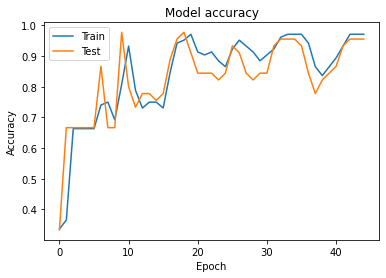

In [45]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()